### Categorizing the type of leaf disease of Apple trees

#### Problem Statement 

Predicting healthiness/disease of an apple tree based on leaf image

#### Performance Metric
https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7/overview/evaluation

 mean column-wise ROC AUC

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install kaggle
!mkdir kaggle

In [3]:
#need to be executed while downloading data-->> environment for downloading
import os
os.environ['KAGGLE_USERNAME'] = "interioamar" # username from the json file
os.environ['KAGGLE_KEY'] = "xxxxb6c48c8cxxcc85c3627xxxx" # key from the json file

In [4]:
#https://stackoverflow.com/questions/51958553/error-while-importing-kaggle-dataset-on-colab
! echo chmod 600 ~/kaggle/kaggle.json

chmod 600 /root/kaggle/kaggle.json


In [5]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

 98% 761M/779M [00:19<00:00, 46.1MB/s]
100% 779M/779M [00:19<00:00, 42.6MB/s]


In [ ]:
##unzipping the data
#https://askubuntu.com/questions/219392/how-can-i-uncompress-a-7z-file
!sudo apt install p7zip-full -y
!7z x plant-pathology-2020-fgvc7.zip

General information about the dataset:
1. Total number of images =3642
2. Target columns : Healthy, Multiple diseases, Rust, Scab

Dataset is having both train.csv & test.csv files

train.csv is having total 5 columns i.e. image_id and 4 categories of target columns labelled in binary format.

* Total number of datapoints in train.csv file are : 1821
* Total number of datapoints in test.csv file are : 1821
* Image_id: the unique key for datapoints

In [7]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print('Train & Test data shape: ', train_df.shape,test_df.shape) #test_df will have only image_id in it 
train_df.head(5)

Train & Test data shape:  (1821, 5) (1821, 1)


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [8]:
train_df.describe()[:3]

,healthy,multiple_diseases,rust,scab
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.283361,0.049973,0.341571,0.325096
std,0.450754,0.217948,0.474367,0.468539


#### Observations:
* Here count for all the category remains same since target classes are one hot encodeed
* We can see the mean of "multiple_diseases" is smaller followed by "healthy". It indicates there are less records which categorize multiple disease leaf and healthy leaf
* Mean sum of all the classes is 1 which tells that records are not having multiclass labelling as well as each of records are labelled with one class 

In [9]:
#checking null/not null column
# we observe that all the categories are labelled and are not null
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


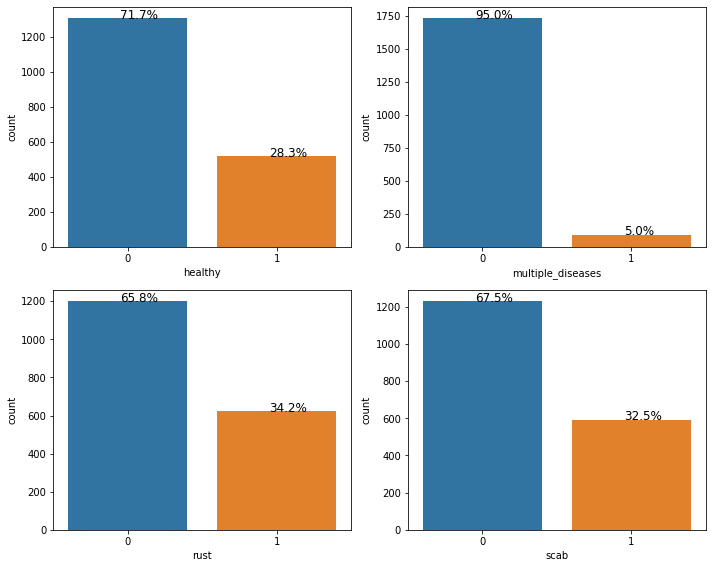

In [10]:
#https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn  -->> for annotating pecentage on top of bar
import seaborn as sns
import matplotlib.pyplot as plt

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches: #Rectangle((x,y)=(-0.4, 0), width=0.8, height=1305, angle=0) -->> x=-0.4 
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)  #height is the count of class in dataset)
        x = p.get_x() + p.get_width() / 2 - 0.05  # -->> x is the start of box and width/2 makes points to center and subtract with 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

plt.figure(figsize=(10,8))
for index,i in enumerate(['healthy','multiple_diseases', 'rust', 'scab']):
  plt.subplot(2, 2, index+1)
  ax = sns.countplot(x=i,data=train_df)
  #percentage=dict(train_df[i].value_counts() *100/len(train_df[i]))
  without_hue(ax,train_df[i])
plt.tight_layout()
plt.show()

#### Observations:
* We observe that "rust"and "scab"category records are 34% and 32% respectively and "multiple_diseases" leaf category records are  only 5%
* Class imbalance exists where "multiple_disease" class becomes the minority class

#### Visualizing the sample leafs of all categories

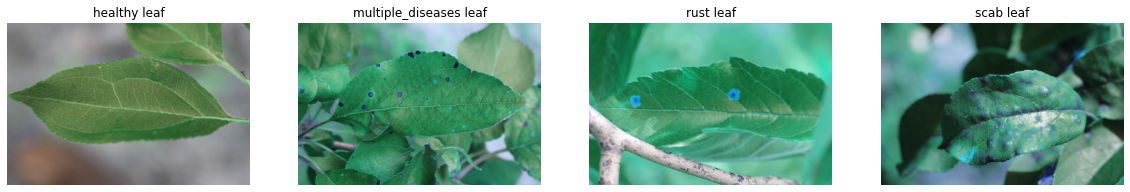

In [11]:
##https://www.kaggle.com/code/meemr5/plant-pathology-2020-eda-ia-ip-models/notebook

#visualizing the sample leaf
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
j=20  #input random number less than 91 since multiple disease records are 91
plt.figure(figsize=(20,10))
for index,i in enumerate(['healthy','multiple_diseases', 'rust', 'scab']):
  plt.subplot(1, 4, index+1) #(rows,col,index)
  image_id_1=train_df[train_df[i]==1]['image_id'].iloc[j]
  image=cv2.imread('images/{}.jpg'.format(image_id_1))
  plt.imshow(image)
  plt.axis('off')
  plt.title("{} leaf".format(i))

#### Storing train and test images in seperate folder and image_size check

In [12]:
#execute when freshly running the ipynb

# for name in ['train','test']:
#   if os.path.exists('images/{}/'.format(name)):
#     shutil.rmtree('images/{}/'.format(name))  #deleting all the newly created folders

In [13]:
##execute when freshly running the ipynb

# for name in ['train','test']:
#   if not os.path.exists('images/{}/'.format(name)):
#     os.makedirs('images/{}/'.format(name))  #creating directory for each category

In [14]:
#https://www.geeksforgeeks.org/finding-the-size-resolution-of-image-in-python/ 
from tqdm.notebook import tqdm
import shutil 
#train_image=[]
train_image_height=[]
train_image_width=[]

#test_image=[]
test_image_height=[]
test_image_width=[]
for i in tqdm(os.listdir('images/')):
    if "Train" in i:
      #train_image.append(i)
      image=cv2.imread('images/{}'.format(i))
      train_image_height.append(image.shape[0])
      train_image_width.append(image.shape[1])
      #moving the train images to train folder
      shutil.copy('images/{}'.format(i), 'images/train/{}'.format(i)) #copying into specific folder
    
    elif "Test" in i:
      #test_image.append(i)
      image=cv2.imread('images/{}'.format(i))
      test_image_height.append(image.shape[0])
      test_image_width.append(image.shape[1])
      #moving the test images to test folder
      shutil.copy('images/{}'.format(i), 'images/test/{}'.format(i)) #copying into specific folder



  0%|          | 0/3644 [00:00<?, ?it/s]

In [15]:
print("== Training image size check ===")
average_image_height=sum(train_image_height)/len(train_image_height)
average_image_width=sum(train_image_width)/len(train_image_width)
print("Average train image height and width are: ",average_image_height,average_image_width)
print("Minimum height and width are: ", min(train_image_height),min(train_image_width))
print("Maximum height and width are: ", max(train_image_height),max(train_image_width))

print("\n == Testing image size check ===")
average_test_image_height=sum(test_image_height)/len(test_image_height)
average_test_image_width=sum(test_image_width)/len(test_image_width)
print("Average test image height and width are: ",average_test_image_height,average_test_image_width)
print("Minimum height and width are: ", min(test_image_height),min(test_image_width))
print("Maximum height and width are: ", max(test_image_height),max(test_image_width))


== Training image size check ===
Average train image height and width are:  1365.7501372872048 2047.2498627127952
Minimum height and width are:  1365 1365
Maximum height and width are:  2048 2048

 == Testing image size check ===
Average test image height and width are:  1372.5013728720483 2040.4986271279517
Minimum height and width are:  1365 1365
Maximum height and width are:  2048 2048


#### Observations:
* Train and Test image sizes are almost same. So we can choose one standard size for an image.

#### Image Augmentation

* ImageDataGenerator generates batches of tensor image data with real-time data augmentations which expands the dataset size and makes the training data rich
* Transforms include image manipulation, such as shifts, rotation, brightness etc
* Below, sample leaf each classes are augmented with flip, rotation and brightness

In [21]:
#https://www.kaggle.com/code/meemr5/plant-pathology-2020-eda-ia-ip-models/notebook  -->> using tf.image
#https://www.tensorflow.org/tutorials/images/data_augmentation  -->>tf.keras.layers augmentation method
import tensorflow as tf
import random
def imageAugmentation(image,aug,leaf_type):

    plt.figure(figsize=(15,10))
    plt.subplot(1, 4, 1)
    plt.title("{} leaf Original Image".format(leaf_type[:10]))
    plt.imshow(image)
    plt.axis('off')
 
    if aug == True :
        
        plt.subplot(1, 4, 2)
        image1 = tf.image.random_brightness(image,max_delta=0.5,seed=10)  #brightness value ma_delta
        plt.title("Brightness Image")
        plt.imshow(image1)
        plt.axis('off')

        plt.subplot(1, 4, 3)
        image1 = tf.image.random_flip_left_right(image,seed=10)
        plt.title("Flipped left_right Image")
        plt.imshow(image1)
        plt.axis('off')

        plt.subplot(1, 4, 4)
        image1=tf.keras.layers.Rescaling(scale =1/255, offset=0.0)(image)
        image1 = tf.keras.layers.RandomRotation(0.8,interpolation='bilinear',fill_mode='nearest')(image1)
        plt.title("Rotated Image")
        plt.imshow(image1)
        plt.axis('off')

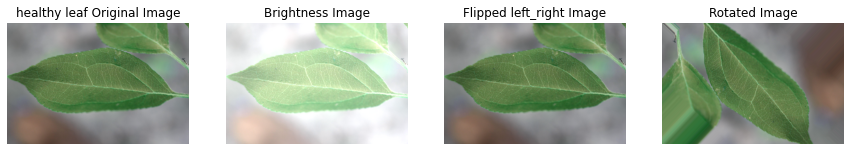

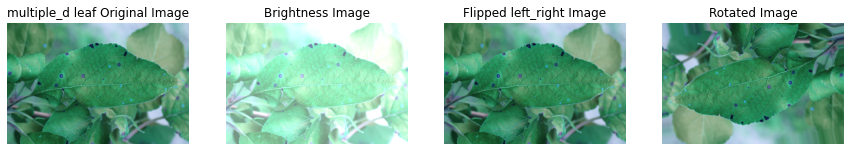

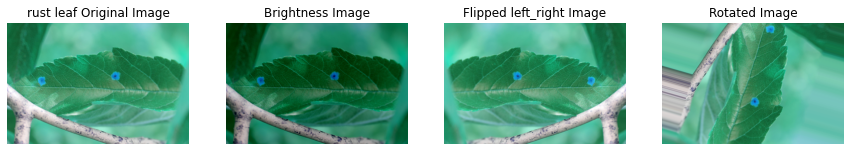

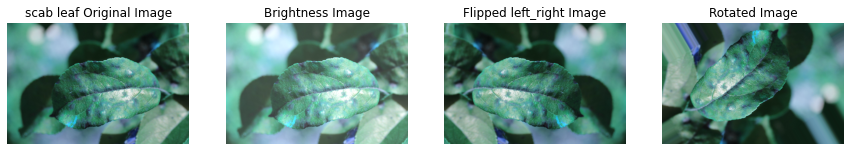

In [22]:
for index,i in enumerate(['healthy','multiple_diseases', 'rust', 'scab']):
  image_id_1=train_df[train_df[i]==1]['image_id'].iloc[j]
  image=cv2.imread('images/{}.jpg'.format(image_id_1)) #'images/{}.jpg'.format(image_id_1)
  img = np.expand_dims(image,axis=0)
  leaf_type=i
  imageAugmentation(image,True,leaf_type)